In [1]:
import numpy as np 
import matplotlib.pyplot as plt

[ 0.1  0.   0.   0.   0.   0.1  0.1  0.5  0.3  0.2  0.4  0.6  0.6  0.6
  0.7  0.9  1.4  1.7  1.3  2.7  4.1  3.4  4.   4.8  7.1  6.1  8.9  9.2
 11.9 13.2 15.3 16.8 18.4 21.6 25.9 27.4 30.2 32.1 34.1 37.6 43.5 43.
 46.7 49.  51.9 57.9 57.2 57.4 59.5 62.9 62.8 62.6 60.7 62.4 63.9 59.3
 59.6 57.7 55.9 54.3 51.6 47.  46.6 40.4 37.8 37.  31.4 28.8 29.4 24.2
 23.1 19.2 16.6 11.9 13.  12.2  8.7 10.   8.1  5.3  5.3  3.5  4.2  2.4
  2.   1.3  1.4  1.   0.7  0.5  0.6  0.7  0.3  0.3  0.1  0.4  0.1  0.1
  0.   0.3]


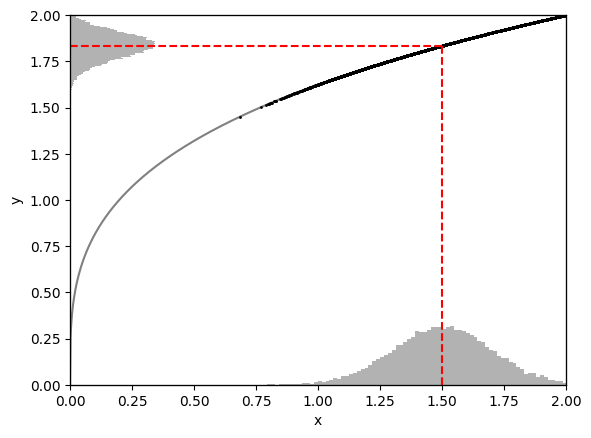

In [2]:
n = 20000
mean = 1.5
x = mean + np.random.randn(n) * 0.2
def f(x):
    return np.power(x/2, 0.3) * 2

y = f(x)
u = np.linspace(0, 2, 1000)
v = f(u)

fig, ax = plt.subplots()
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.plot(u, v, "-", label="y = sin(x)", color="gray")
ax.plot(x, y, "o", markersize=1, label="y = sin(x)", color="black")
ax_histx = ax.twinx()
hist_x, bins_x, _ = ax_histx.hist(
    x, bins=100, alpha=0.6, color="gray", orientation="vertical"
)
ax_histx.cla()  # Clear the histogram to redraw with scaled heights
a=10
ax.bar(
    x=bins_x[:-1],
    height= a * hist_x / n,
    width=np.diff(bins_x),
    alpha=0.6,
    color="gray",
    align="edge",
)
print(hist_x*0.1)

ax_histx.get_yaxis().set_visible(False)
ax_histy = ax.twiny()
ax_histy.hist(y, bins=100, alpha=0.6, color="gray", orientation="horizontal")
ax_histy.cla()  # Clear the histogram to redraw with scaled heights
hist_y, bins_y, _ = ax_histy.hist(
    y, bins=100, alpha=0., color="gray", orientation="horizontal"
)
ax.barh(
    y=bins_y[:-1],
    width= a * hist_y / n,
    height=np.diff(bins_y),
    alpha=0.6,
    color="gray",
    align="edge",
)
ax_histy.get_xaxis().set_visible(False)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.plot([mean, mean], [0, f(mean)], "r--")  # Vertical line
ax.plot([0, mean], [f(mean), f(mean)], "r--")  # Horizontal line


In [3]:
# save fig as webp
fig.savefig("histogram.webp", format="webp")
fig.savefig("histogram.png", format="png")


/tmp/ipykernel_80203/3690593341.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax1.plot(0, 0, "ro", color="sienna")  # Origin in the left plot
/tmp/ipykernel_80203/3690593341.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax2.plot(0, 0, "ro", color="sienna")  # Origin in the right plot


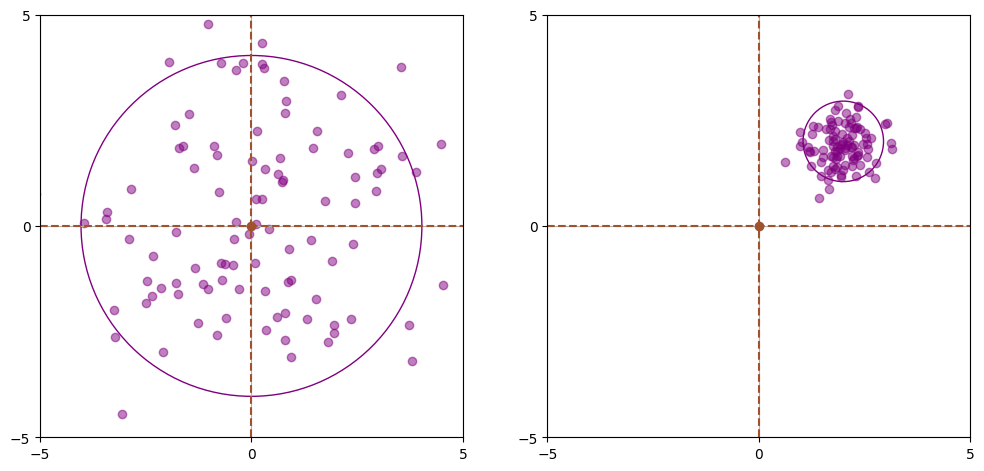

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data for the left plot (high variance, no bias)
np.random.seed(0)
x1 = np.random.randn(100) * 2
y1 = np.random.randn(100) * 2

# Generate data for the right plot (low variance, nonzero bias)
center = (2,2)
x2 = center[0] + np.random.randn(100) * 0.5
y2 = center[1] + np.random.randn(100) * 0.5

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Left plot
ax1.scatter(x1, y1, alpha=0.5, color="purple")
ax1.set_xlim(-10, 10)
ax1.set_ylim(-10, 10)
#ax1.set_title("Biais nul mais RQ élevé")
ax1.axhline(0, color="sienna", linestyle="--")
ax1.axvline(0, color="sienna", linestyle="--")
circle1 = plt.Circle((0, 0), 2 * np.std(x1), color="purple", fill=False)
ax1.add_artist(circle1)

# Right plot
ax2.scatter(x2, y2, alpha=0.5, color="purple")
ax2.set_ylim(-10, 10)
#ax2.set_title("Biais non nul et RQ faible")
ax2.axhline(0, color="sienna", linestyle="--")
ax2.axvline(0, color="sienna", linestyle="--")
circle2 = plt.Circle(center, 2 * np.std(x2), color="purple", fill=False)
ax2.add_artist(circle2)

for ax in (ax1, ax2):
    ax.set_aspect("equal", "box")
    ax.grid(True)
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)


# Highlight the origin
ax1.plot(0, 0, "ro", color="sienna")  # Origin in the left plot
ax2.plot(0, 0, "ro", color="sienna")  # Origin in the right plot

# Show the plot
plt.show()

In [5]:
# save as webp
fig.savefig("bias-variance.webp", format="webp")
fig.savefig("bias-variance.png", format="png")